<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/embedding-methods-for-image-search/01_building_color_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building Color Histograms

To build our histograms we will be relying primarily on the OpenCV and Numpy libraries.

* **OpenCV** is a popular **C**omputer **V**ision (CV) library, it's full of useful image load/save and manipulation functions.
* **NumPy** is a very popular library focused on providing optimized numerical operations for multi-dimensional arrays.

##Setup

In [ ]:
!pip install opencv-python numpy datasets

In [2]:
from datasets import load_dataset

from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt

Let's get a set of images, we will use the `pinecone/image-set` dataset from HuggingFace datasets:

In [4]:
data = load_dataset("pinecone/image-set", split="train", revision="e7d39fc")
data

Dataset({
    features: ['image_bytes', 'image'],
    num_rows: 21
})

Inside the *image_bytes* feature we have base64 encoded bytes representation of the images, we can decode them into Numpy arrays using the Open-CV library like so:

In [6]:
def process_fn(sample):
  image_bytes = b64decode(sample["image_bytes"])
  image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)
  return image

images = [process_fn(sample) for sample in data]

We can display images with matplotlib.

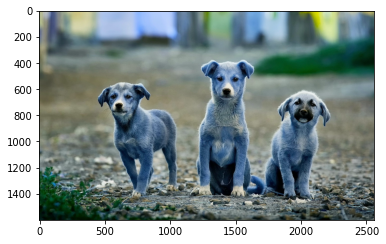

In [7]:
plt.imshow(images[0])

The three dogs look strangely blue; that’s not intentional. OpenCV loads images in a Blue Green Red (BGR) format. Matplotlib expected RGB, so we must flip the color channels of the array to get the true color image.

<img src='https://d33wubrfki0l68.cloudfront.net/aa211c64e2500d0df325a98384b90ceaad22f084/3c750/images/color-histograms-5.png' width='600'/>


In [8]:
shape = images[0].shape
shape, images[0][0, 0, :]

rgb_image = np.flip(images[0], 2)

shape = rgb_image.shape
shape, rgb_image[0, 0, :]

((1600, 2560, 3), array([134, 174, 165], dtype=uint8))

Note that while the `shape` of the array has remained the same, the three values have been reversed (those three values are the BGR -> RGB values for a single pixel in the images).

Now we can visualize in real color.

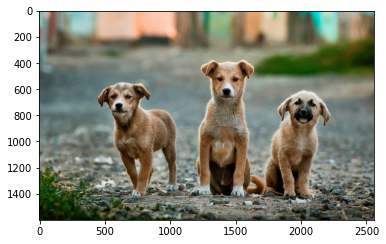

In [9]:
plt.imshow(rgb_image)

##Building Histogram Step-by-Step